In [ ]:
import cv2

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
filename= '/ss.jpg'

In [ ]:
img = cv2.imread(filename)
def read_file(img):
    img= cv2.imread(filename)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

In [ ]:
def read_file(img):
    img= cv2.imread(filename)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

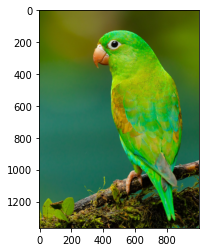

array([[[ 67,  92,   1],
        [ 67,  92,   1],
        [ 67,  92,   0],
        ...,
        [ 82,  98,   0],
        [ 82,  98,   0],
        [ 82,  98,   0]],

       [[ 67,  92,   1],
        [ 67,  92,   1],
        [ 67,  92,   0],
        ...,
        [ 82,  98,   0],
        [ 82,  98,   0],
        [ 82,  98,   0]],

       [[ 67,  92,   1],
        [ 67,  92,   1],
        [ 67,  92,   0],
        ...,
        [ 81,  99,   0],
        [ 81,  99,   0],
        [ 81,  99,   0]],

       ...,

       [[ 86,  78,   0],
        [112, 104,  19],
        [ 98,  90,   5],
        ...,
        [ 83, 104,  37],
        [ 64,  76,  14],
        [ 42,  52,   0]],

       [[ 94,  87,   0],
        [109, 102,  12],
        [ 99,  92,   4],
        ...,
        [ 64,  83,  17],
        [ 51,  59,   0],
        [ 43,  46,   0]],

       [[100,  94,   0],
        [108, 102,   8],
        [103,  96,   6],
        ...,
        [ 45,  69,  11],
        [ 41,  51,   0],
        [ 44,  48,   0]]

In [ ]:
read_file(filename)

In [ ]:
def edge_mask(img, line_size, blur_value):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray, blur_value)
    
    edges=cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

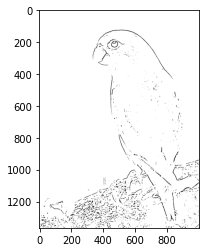

-1

In [ ]:
line_size, blur_value = 7,7
edges= edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap='gray')
plt.show()
cv2.waitKey(0)

In [ ]:
def color_quantizations(img, k):
    data= np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center= np.uint8(center)
    result = center[label.flatten()]
    result= result.reshape(img.shape)
    return result

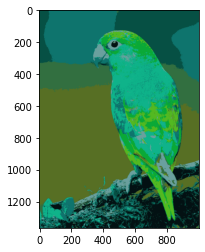

In [ ]:
img = color_quantizations(img, k=9)
plt.imshow(img)
plt.show()

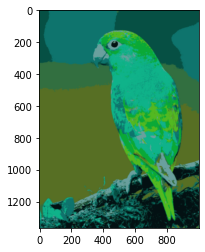

In [ ]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor = 200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [ ]:
def cartoon():
    c=cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.imshow(c)
    plt.show()

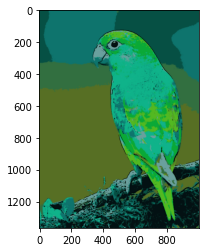

In [ ]:
cartoon()